In [6]:
import numpy as np  # NumPyをnpとしてインポート
import pandas as pd

# NumPyの表示精度を設定
np.set_printoptions(precision=3)

# Pandasの表示精度を設定
pd.set_option('display.float_format', '{:.3f}'.format)

try:
    get_ipython().run_line_magic('precision', '3')
except NameError:
    pass  # Jupyter環境外では何もしない

In [13]:
df = pd.read_csv('../data/ch2_scores_em.csv', index_col='生徒番号')

In [11]:
df.head()

,英語,数学
生徒番号,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [18]:
en_scores = np.array(df['英語'])[:10]
ma_scores = np.array(df['数学'])[:10]
en_scores, ma_scores

(array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58]),
 array([65, 80, 63, 63, 76, 60, 81, 66, 78, 82]))

In [22]:
scores_df = pd.DataFrame(
    {'英語': en_scores,
     '数学': ma_scores},
    index=pd.Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], name='生徒')
)
scores_df.head()

,英語,数学
生徒,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76


### ２つのデータの相関性
英語と数学の点数、両方とも高い場合は、正の相関がある。逆であれば負の相関。無関係であれば無相関。
確認するために散布図を書く。

In [25]:
np.mean(ma_scores)

71.400

In [26]:
scores_df.corr()

,英語,数学
英語,1.000,0.819
数学,0.819,1.000


### ２次元データの視覚化
散布図を使って２次元データを視覚化する。

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

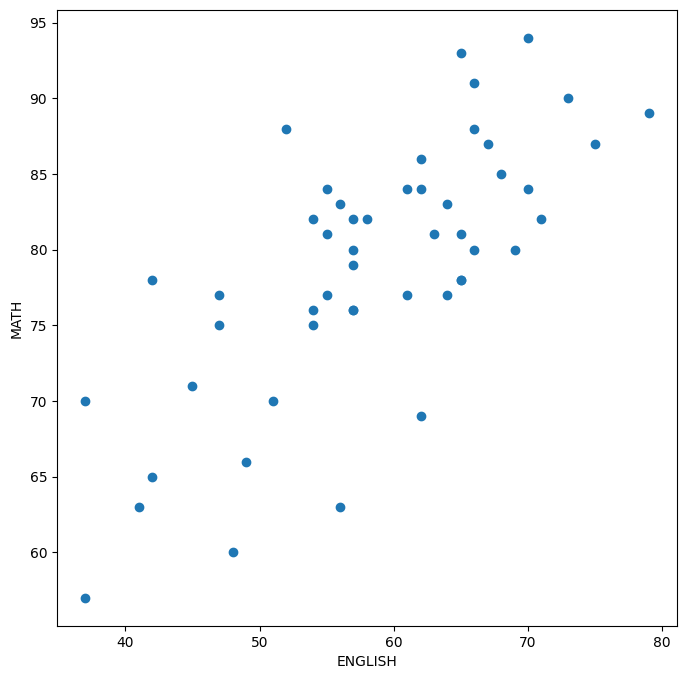

In [30]:
english_scores = np.array(df['英語'])
math_scores = np.array(df['数学'])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

ax.scatter(english_scores, math_scores)
ax.set_xlabel('ENGLISH')
ax.set_ylabel('MATH')

plt.show()

### 回帰直線
regression lineは２つのデータ間の関係性を最もよく表現する直線です。

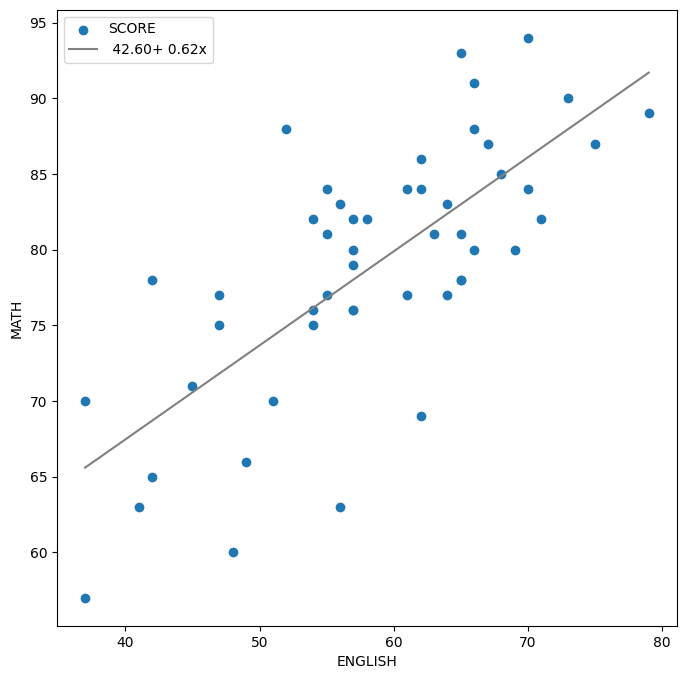

In [37]:
poly_fit = np.polyfit(english_scores, math_scores, 1)
poly_1d = np.poly1d(poly_fit)

xs = np.linspace(english_scores.min(), english_scores.max())
ys = poly_1d(xs)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.set_xlabel('ENGLISH')
ax.set_ylabel('MATH')
ax.scatter(english_scores, math_scores, label='SCORE')
ax.plot(xs, ys, color='grey', 
        label=f'{poly_fit[1]: .2f}+{poly_fit[0]: .2f}x')
ax.legend(loc='upper left')

plt.show()